# Neural Network: Clustering

> Enzo Sergiani


- Based on this example, create 16 clusters and their associated classes.
- Repeat it to obtain two datasets, one for training and one for validation.
- Build neural network classifier and train it
- Trace loss and accuracy history.
- Evaluate it over the validation set and display confusion matrix


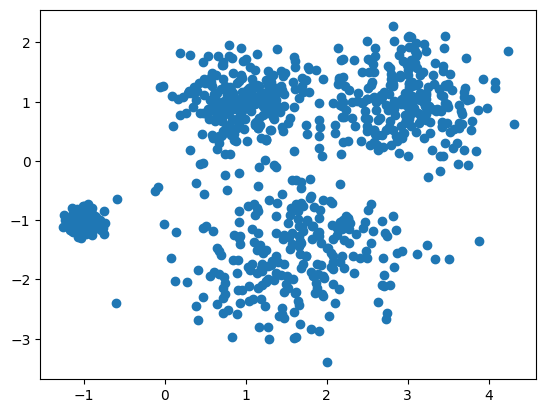

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1.5, -1.5], [3, 1]]
X, labels = make_blobs(
    n_samples=1000, centers=centers, cluster_std=[0.4, 0.1, 0.75, 0.5], random_state=0
)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
centers = np.random.rand(16, 2) * 10 - 5  # Generating random centers for 16 clusters
X, labels = make_blobs(n_samples=2000, centers=centers, cluster_std=0.5, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(
    X, labels, test_size=0.2, random_state=42
)

y_train_cat = to_categorical(y_train, num_classes=16)
y_val_cat = to_categorical(y_val, num_classes=16)

In [38]:
model = Sequential(
    [
        Dense(64, input_dim=2, activation="relu"),
        Dense(64, activation="relu"),
        Dense(16, activation="softmax"),
    ]
)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,392 (21.06 KB)

 Trainable params: 5,392 (21.06 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(
    X_train, y_train_cat, epochs=50, batch_size=32, validation_data=(X_val, y_val_cat)
)

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

conf_matrix = confusion_matrix(y_val, y_val_pred_classes)
accuracy = accuracy_score(y_val, y_val_pred_classes)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1662 - loss: 2.5104 - val_accuracy: 0.4075 - val_loss: 1.7552
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4777 - loss: 1.5891 - val_accuracy: 0.5975 - val_loss: 1.1942
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5754 - loss: 1.1677 - val_accuracy: 0.6275 - val_loss: 0.9926
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6353 - loss: 0.9519 - val_accuracy: 0.6625 - val_loss: 0.8727
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - loss: 0.8793 - val_accuracy: 0.6825 - val_loss: 0.7969
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - loss: 0.7860 - val_accuracy: 0.6875 - val_loss: 0.7607
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7020 - loss: 0.7267 - val_accuracy: 0.7375 - val_loss: 0.6781
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7512 - loss: 0.6732 - val_accuracy: 0.7675 - val_loss:

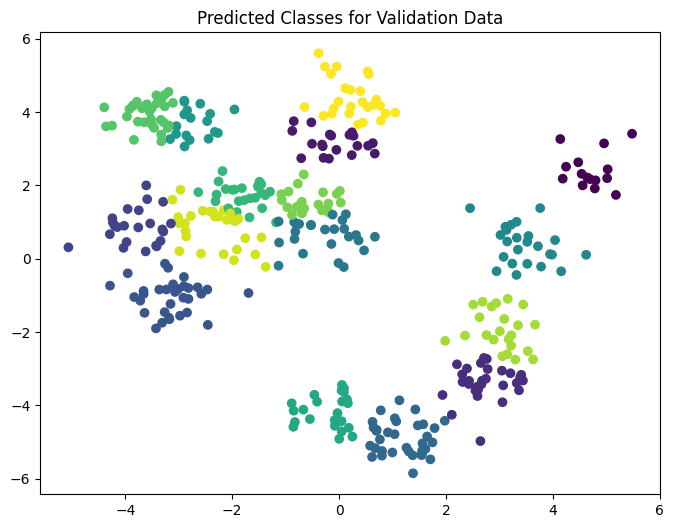

Validation Accuracy: 86.00%


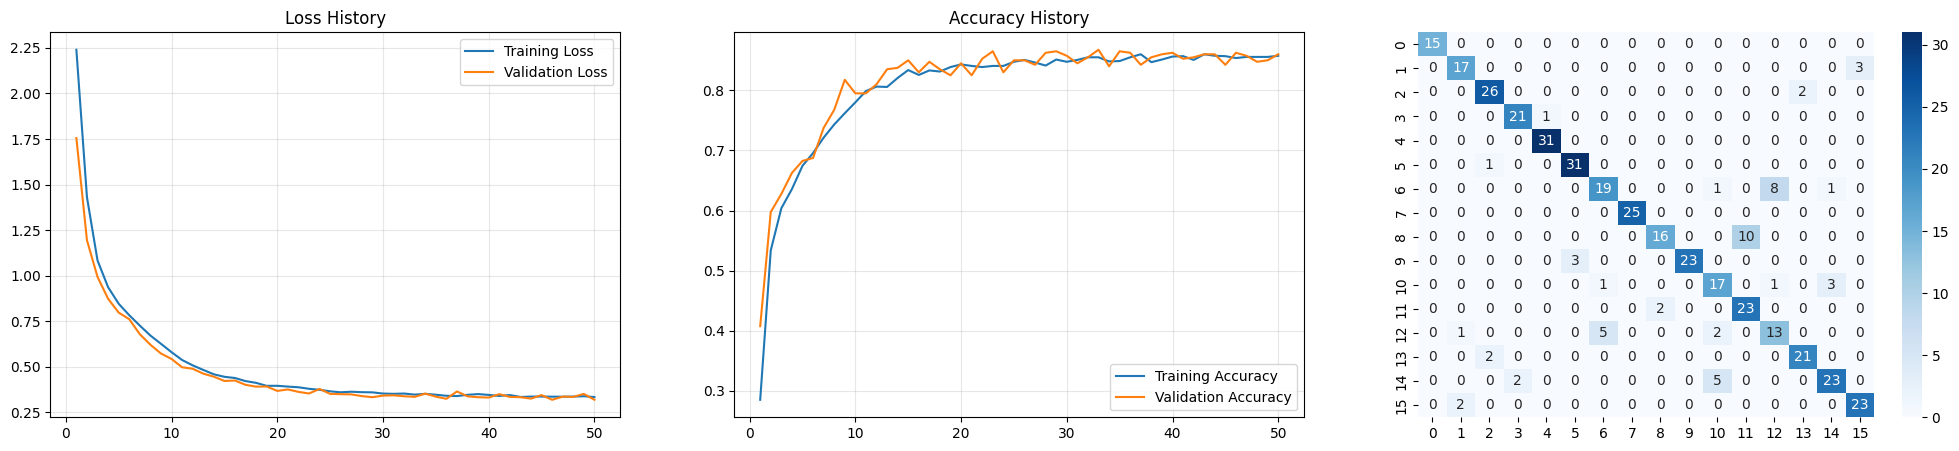

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val_pred_classes, cmap="viridis")
plt.title("Predicted Classes for Validation Data")
plt.show()

print(f"Validation Accuracy: {accuracy*100:.2f}%")

plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
sns.lineplot(x=range(1, 51), y=history.history["loss"], label="Training Loss")
sns.lineplot(x=range(1, 51), y=history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss History")
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
sns.lineplot(x=range(1, 51), y=history.history["accuracy"], label="Training Accuracy")
sns.lineplot(
    x=range(1, 51), y=history.history["val_accuracy"], label="Validation Accuracy"
)
plt.legend()
plt.title("Accuracy History")
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")

plt.show()

In [41]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

14255/14255 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step


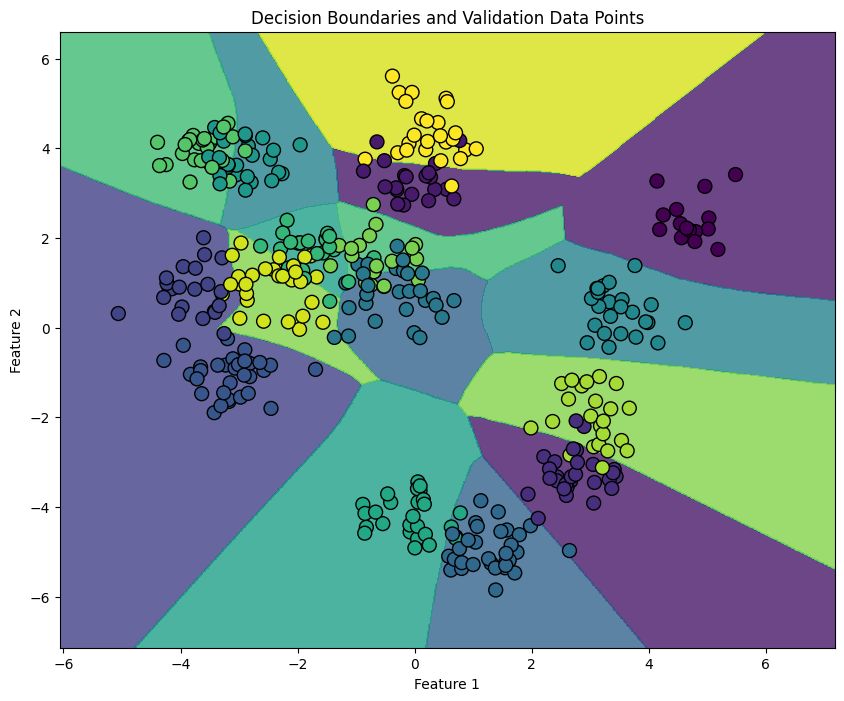

In [42]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap="viridis", alpha=0.8)

# Plot the original validation data points
plt.scatter(
    X_val[:, 0], X_val[:, 1], c=y_val, edgecolor="k", marker="o", s=100, cmap="viridis"
)
plt.title("Decision Boundaries and Validation Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()